# When Will You Die In PLAYERUNKNOWN'S BATTLEGROUNDS?

## What is PLAYERUNKNOWN'S BATTLEGROUNDS?

PLAYERUNKNOWN'S BATTLEGROUNDS, aka PUBG, is a Battle Royale online game with an enormous player community. A battle royale game has typically 100 players in an arena with weapons and items scattered throughout the arena, where players drop into the map and try to gether loot in order to outlive everybody else. Throughout any given match, the playable map size also decreases as the game progresses in order to force remaining players to kill each other in order to create a winner. This is done by making zones on the map that will slowly get smaller and smaller until the entire map is covered. The outside zone, called the blue zone in the dataset, will damage players more and more as each playable zone decreases in size, and will eventually kill someone that is stuck in the blue zone.

## Problem

A game needs it playerbase to derive a form of fun from it in order to capture a player's devotion to it. Especially in an online game, it requires this factor even more otherwise the players will move onto something else that will give them the fun that they crave. In a Battle Royale game, the fun comes from the adrenaline rush of surviving and beating other players and getting closer to winning the match. 

## Client

The game development studio, PUBG Corporation can use this analysis to see how players are enjoying the game and if any improvements can be made in order to increase their playerbase, as well as to keep the current playerbase happy enough to keep playing. 

## Data Wrangling Process

First thing done after loading in each dataset was I joined the datasets together. Then, only rows that contained the map name Erangel in the map column was kept. Also, in order to remove any outliers, any rows where the timer value was bigger than 2000 seconds was removed, since a match can only last for about 2000 seconds before the blue zone covers the entire map and kills any remaining players. One dataset is made to count the number of deaths for every unique cause of death in the dataset. Another dataset is made, the cleaned data grouped by its match id, then its average death timers were calculated into a series. Several plots were made to look at trends in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a = pd.read_csv('kill_match_stats_final_0.csv')
b = pd.read_csv('kill_match_stats_final_1.csv')
c = pd.read_csv('kill_match_stats_final_2.csv')
d = pd.read_csv('kill_match_stats_final_3.csv')
e = pd.read_csv('kill_match_stats_final_4.csv')
f = pd.concat([a,b,c,d,e])
f = f[f.map == 'ERANGEL']
f = f[f.time <= 2000]
f

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
179,Down and Out,Malcolm_x,9.0,496989.8,312569.7,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1035,Relugar,22.0,497385.4,331528.2
180,M16A4,Malcolm_x,9.0,496989.8,312569.7,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1035,LiPoBattery,22.0,497819.4,331981.3
181,AKM,G_Berg,7.0,460416.7,414748.8,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1422,cornsour,16.0,459817.9,414426.3
182,AKM,Lukesnake17,20.0,488034.1,347220.3,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1210,Homebrw,9.0,487444.2,347651.0
183,SKS,AlooGobi,2.0,501062.9,425078.6,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1818,Powfa,3.0,493043.4,434458.1
184,M416,Powfa,3.0,495501.2,429826.2,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1766,kittykat6,6.0,495755.7,438322.0
185,Down and Out,Snowzcone,44.0,466173.1,642295.2,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,GoochSlapper69,49.0,466214.9,641051.5
186,M416,DevilBlood35,1.0,512029.6,450259.2,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1579,Malcolm_x,9.0,509867.3,437920.8
187,Down and Out,NaN,NaN,NaN,NaN,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1646,Naksam,8.0,475198.1,426731.2
188,S1897,MaelstromPhoenix,14.0,446553.8,621515.8,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,105,df434,46.0,446698.3,621034.1


## What is the average time of death in a match?

 

#### Histogram of the probability of death in all matches

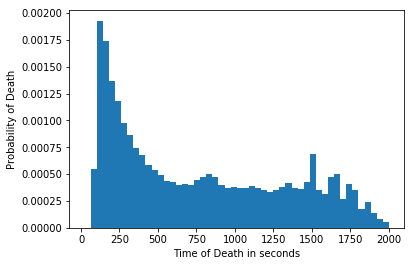

In [3]:
plt.hist(f.time,bins=50,normed=True)
plt.xlabel('Time of Death in seconds')
plt.ylabel('Probability of Death')
plt.show()

A list of the most common causes of death in PUBG shows that although many players die due to other players killing them, there is still a large number of players that die due to the environment. Down and out in this list is when a player dies due to bleeding out while being knocked down. Getting knocked down means that a player in a team loses all his health and is incapacitated, bleeding out, and must wait for his teammate to help him back up before the bleed out meter reaches zero.

In [10]:
h = f.groupby('killed_by').count()
h = h.time.sort_values(ascending=False)
h

killed_by
Down and Out                       9007849
M416                               5878107
M16A4                              4985427
SCAR-L                             4848711
AKM                                4535973
UMP9                               2913319
Bluezone                           2583669
S1897                              2343992
Mini 14                            1696285
Punch                              1439944
Kar98k                             1371326
S686                               1337697
S12K                               1206507
SKS                                1201105
Micro UZI                          1068972
Grenade                             938275
Tommy Gun                           674453
P1911                               622441
P92                                 598624
Falling                             597325
Hit by Car                          494973
Vector                              306430
Drown                               231016
U

Here is a list of the average time of death for each match

In [5]:
i = f.groupby('match_id').time.mean()
print(i)
len(f.match_id.unique())

match_id
2U4GBNA0Ymk---ESFMo4Pz01GeMXVAjJMHPQisgZk1_I1DNb7dah-GcLA7417AxW     669.935484
2U4GBNA0Ymk---Hambc68xkUoMaf9WzIZGGxC5vpt50iN2hdzgvov5BiQdj7lj7S     755.134831
2U4GBNA0Ymk--0tBpXVaua0OLoWCdk1JXja7k2kyYYnwtMqUJjhH_psQus-8haMZ     656.642105
2U4GBNA0Ymk--19AClFwp6EHHRiU-E2IbIDIkrw5QpkAS5gFSi02aFTei9DQaX0o     730.045455
2U4GBNA0Ymk--2-aEoqmZQG-mFlNFVzQ3DMZN_d4fVQ9Hb4b4-UKuVoIQhynDynh     741.225806
2U4GBNA0Ymk--3atnvB2Cy2-kmfWLqeLwaiFMfmzWQFhCkWmYZiq4XKDsLngboSq     879.227273
2U4GBNA0Ymk--3atnvB2CyN-7dlbwZnfUK-qkBMJdfrEa2OermiCnco0lv0nFxb_     807.505155
2U4GBNA0Ymk--3eiHoaWZvPpeDFMZNYSMM6AOtbUTMCM85nnoNrjNVLzIPDXtHsh     682.057471
2U4GBNA0Ymk--7qt8xPyFW0ndWz7dIODaGxvZ65u0FW-26xh4B19pC08jYSAeLOK     687.936842
2U4GBNA0Ymk--Ct3NwfrrRsDPvvn9aNF4vMGw1-q2uOygezUjSr9J2D6pMQ3KYsu     794.720430
2U4GBNA0Ymk--IzbW-ihltP44UHbUvm7oAku86yTg7UOs4oWhJhsnTMzjwRkf72n     756.261364
2U4GBNA0Ymk--J_6mY26RDDvrD1K_0ywYSYCkVTPhgE8-OR8R69jnrdKL8Kmc0IY     805.252874
2U4GBNA0Ymk--LNGPewkO0NBW-19dTh

579541

#### Histogram of the average time of death in each match

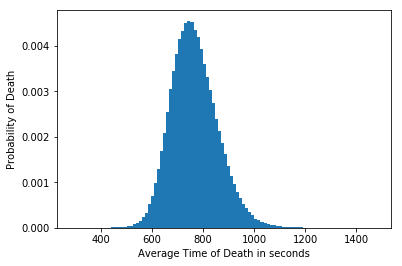

In [6]:
plt.hist(i,bins=100,normed=True)
plt.xlabel('Average Time of Death in seconds')
plt.ylabel('Probability of Death')
plt.show()

The histogram's shape heavily assumes that it follows a normal distribution. The Central Limit Theorem is also useful in proving this assumption. Since every match is independent of the others, this means that the average death time for each match is also independent of the other. Also since there are 579451 unique matches in the dataset, it is safe to say that there is a large enough sample size to assume the Central Limit Theorem is correct here.

In [7]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1) / n
    return x,y


766.1185548704882
92.72041185295312


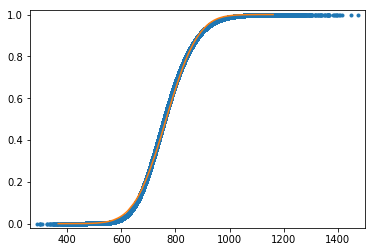

In [8]:
i_mean = np.mean(i)
i_std = np.std(i)
print(i_mean)
print(i_std)
x,y=ecdf(i)
_=plt.plot(x,y,marker='.',linestyle='none')
plt.margins(0.02)
norm_means = np.random.normal(i_mean,i_std,100000)
x_1,y_1 = ecdf(norm_means)
_ = plt.plot(x_1,y_1)
plt.show()

The cumulative distribution line for a normal distribution given the mean and standard deviation of the mean death timer in a match dataset fits very closely to the cumulative distribution of the actual data which cements the idea that the dataset closely follows the normal distribution.

In [9]:
print('Mean:',i_mean)
me = 1.96 * i_std
print('Margin of Error: ',me)
conf_int = [(i_mean - (1.96*i_std)),(i_mean + (1.96*i_std))]
print("95% confidence interval: ",conf_int)

Mean: 766.1185548704882
Margin of Error:  181.73200723178812
95% confidence interval:  [584.3865476387001, 947.8505621022763]
